# Models

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_validate, RandomizedSearchCV

In [2]:
# load data
X_test_cr = pd.read_csv('X_test_cr.csv', index_col=0)
X_test_cr.head()

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,On_time,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F
8442,3,252,2,4,4098,1,0,0,0,1,0,0,0,1,1,0,0,0
8368,4,147,3,9,4534,1,0,0,1,0,0,1,0,0,0,0,1,0
2972,3,228,2,46,3306,1,1,0,0,0,0,0,0,1,0,0,1,0
6561,6,161,4,9,1377,0,0,1,0,0,0,0,1,0,0,1,0,1
4885,5,172,2,7,5165,0,0,0,0,0,1,0,0,1,1,0,0,1


In [3]:
X_test_cr_scaled = pd.read_csv('X_test_cr_scaled.csv', index_col=0)
X_test_cr_scaled.head()

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,On_time,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F
0,-0.931185,0.870934,-1.027856,-0.577007,0.284948,0.825691,-0.451142,-0.445841,-0.445291,2.213912,-0.70205,-0.442723,-0.436834,0.692510,3.283156,-0.963064,-0.875507,-1.019163
1,-0.050069,-1.317772,-0.372248,-0.268145,0.552375,0.825691,-0.451142,-0.445841,2.245722,-0.451689,-0.70205,2.258748,-0.436834,-1.444023,-0.304585,-0.963064,1.142195,-1.019163
2,-0.931185,0.370658,-1.027856,2.017441,-0.200837,0.825691,2.216598,-0.445841,-0.445291,-0.451689,-0.70205,-0.442723,-0.436834,0.692510,-0.304585,-0.963064,1.142195,-1.019163
3,1.712162,-1.025945,0.283359,-0.268145,-1.384019,-1.211106,-0.451142,2.242954,-0.445291,-0.451689,-0.70205,-0.442723,2.289198,-1.444023,-0.304585,1.038353,-0.875507,0.981197
4,0.831047,-0.796652,-1.027856,-0.391690,0.939408,-1.211106,-0.451142,-0.445841,-0.445291,-0.451689,1.42440,-0.442723,-0.436834,0.692510,3.283156,-0.963064,-0.875507,0.981197


In [4]:
X_test_ot = pd.read_csv('X_test_ot.csv', index_col=0)
X_test_ot.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F
8442,3,5,252,2,4,4098,0,0,0,1,0,0,0,1,1,0,0,0
8368,4,4,147,3,9,4534,0,0,1,0,0,1,0,0,0,0,1,0
2972,3,4,228,2,46,3306,1,0,0,0,0,0,0,1,0,0,1,0
6561,6,2,161,4,9,1377,0,1,0,0,0,0,1,0,0,1,0,1
4885,5,1,172,2,7,5165,0,0,0,0,1,0,0,1,1,0,0,1


In [5]:
X_test_ot_scaled = pd.read_csv('X_test_ot_scaled.csv', index_col=0)
X_test_ot_scaled.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F
0,-0.931185,1.421113,0.870934,-1.027856,-0.577007,0.284948,-0.451142,-0.445841,-0.445291,2.213912,-0.70205,-0.442723,-0.436834,0.692510,3.283156,-0.963064,-0.875507,-1.019163
1,-0.050069,0.713332,-1.317772,-0.372248,-0.268145,0.552375,-0.451142,-0.445841,2.245722,-0.451689,-0.70205,2.258748,-0.436834,-1.444023,-0.304585,-0.963064,1.142195,-1.019163
2,-0.931185,0.713332,0.370658,-1.027856,2.017441,-0.200837,2.216598,-0.445841,-0.445291,-0.451689,-0.70205,-0.442723,-0.436834,0.692510,-0.304585,-0.963064,1.142195,-1.019163
3,1.712162,-0.702231,-1.025945,0.283359,-0.268145,-1.384019,-0.451142,2.242954,-0.445291,-0.451689,-0.70205,-0.442723,2.289198,-1.444023,-0.304585,1.038353,-0.875507,0.981197
4,0.831047,-1.410013,-0.796652,-1.027856,-0.391690,0.939408,-0.451142,-0.445841,-0.445291,-0.451689,1.42440,-0.442723,-0.436834,0.692510,3.283156,-0.963064,-0.875507,0.981197


In [6]:
X_train_cr = pd.read_csv('X_train_cr.csv', index_col=0)
X_train_cr.head()

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,On_time,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F
8077,4,155,4,10,5483,1,0,0,0,0,1,0,1,0,0,1,0,1
4688,3,254,3,6,5716,0,1,0,0,0,0,0,0,1,0,0,1,0
10754,5,227,5,5,1186,0,1,0,0,0,0,0,0,1,0,0,1,0
3390,5,273,3,6,4044,1,0,0,0,1,0,0,0,1,0,0,1,0
693,3,207,7,19,2182,1,0,1,0,0,0,1,0,0,0,0,1,0


In [7]:
X_train_cr_scaled = pd.read_csv('X_train_cr_scaled.csv', index_col=0)
X_train_cr_scaled.head()

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,On_time,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F
0,-0.050069,-1.151014,0.283359,-0.206372,1.134459,0.825691,-0.451142,-0.445841,-0.445291,-0.451689,1.42440,-0.442723,2.289198,-1.444023,-0.304585,1.038353,-0.875507,0.981197
1,-0.931185,0.912624,-0.372248,-0.453462,1.277373,-1.211106,2.216598,-0.445841,-0.445291,-0.451689,-0.70205,-0.442723,-0.436834,0.692510,-0.304585,-0.963064,1.142195,-1.019163
2,0.831047,0.349813,0.938966,-0.515235,-1.501171,-1.211106,2.216598,-0.445841,-0.445291,-0.451689,-0.70205,-0.442723,-0.436834,0.692510,-0.304585,-0.963064,1.142195,-1.019163
3,0.831047,1.308675,-0.372248,-0.453462,0.251826,0.825691,-0.451142,-0.445841,-0.445291,2.213912,-0.70205,-0.442723,-0.436834,0.692510,-0.304585,-0.963064,1.142195,-1.019163
4,-0.931185,-0.067083,2.250181,0.349581,-0.890260,0.825691,-0.451142,2.242954,-0.445291,-0.451689,-0.70205,2.258748,-0.436834,-1.444023,-0.304585,-0.963064,1.142195,-1.019163


In [8]:
X_train_ot = pd.read_csv('X_train_ot.csv', index_col=0)
X_train_ot.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F
8077,4,4,155,4,10,5483,0,0,0,0,1,0,1,0,0,1,0,1
4688,3,4,254,3,6,5716,1,0,0,0,0,0,0,1,0,0,1,0
10754,5,5,227,5,5,1186,1,0,0,0,0,0,0,1,0,0,1,0
3390,5,4,273,3,6,4044,0,0,0,1,0,0,0,1,0,0,1,0
693,3,3,207,7,19,2182,0,1,0,0,0,1,0,0,0,0,1,0


In [9]:
X_train_ot_scaled = pd.read_csv('X_train_ot_scaled.csv', index_col=0)
X_train_ot_scaled.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F
0,-0.050069,0.713332,-1.151014,0.283359,-0.206372,1.134459,-0.451142,-0.445841,-0.445291,-0.451689,1.42440,-0.442723,2.289198,-1.444023,-0.304585,1.038353,-0.875507,0.981197
1,-0.931185,0.713332,0.912624,-0.372248,-0.453462,1.277373,2.216598,-0.445841,-0.445291,-0.451689,-0.70205,-0.442723,-0.436834,0.692510,-0.304585,-0.963064,1.142195,-1.019163
2,0.831047,1.421113,0.349813,0.938966,-0.515235,-1.501171,2.216598,-0.445841,-0.445291,-0.451689,-0.70205,-0.442723,-0.436834,0.692510,-0.304585,-0.963064,1.142195,-1.019163
3,0.831047,0.713332,1.308675,-0.372248,-0.453462,0.251826,-0.451142,-0.445841,-0.445291,2.213912,-0.70205,-0.442723,-0.436834,0.692510,-0.304585,-0.963064,1.142195,-1.019163
4,-0.931185,0.005550,-0.067083,2.250181,0.349581,-0.890260,-0.451142,2.242954,-0.445291,-0.451689,-0.70205,2.258748,-0.436834,-1.444023,-0.304585,-0.963064,1.142195,-1.019163


In [10]:
y_test_cr = pd.read_csv('y_test_cr.csv', index_col=0)
y_test_cr.head()

,Customer_rating
8442,5
8368,4
2972,4
6561,2
4885,1


In [11]:
y_test_ot = pd.read_csv('y_test_ot.csv', index_col=0)
y_test_ot.head()

,On_time
8442,1
8368,1
2972,1
6561,0
4885,0


In [12]:
y_train_cr = pd.read_csv('y_train_cr.csv', index_col=0)
y_train_cr.head()

,Customer_rating
8077,4
4688,4
10754,5
3390,4
693,3


In [13]:
y_train_ot = pd.read_csv('y_train_ot.csv', index_col=0)
y_train_ot.head()

,On_time
8077,1
4688,0
10754,0
3390,1
693,1


# Logistic Regression

In [14]:
# baseline logistic regression model for On_time prediction
lg = LogisticRegression()
lg.fit(X_train_ot, y_train_ot)

/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [15]:
y_pred_ot = lg.predict(X_test_ot)
print(confusion_matrix(y_test_ot, y_pred_ot))
print(classification_report(y_test_ot, y_pred_ot))

[[514 355]
 [456 875]]
              precision    recall  f1-score   support

           0       0.53      0.59      0.56       869
           1       0.71      0.66      0.68      1331

    accuracy                           0.63      2200
   macro avg       0.62      0.62      0.62      2200
weighted avg       0.64      0.63      0.63      2200



# KNN

In [16]:
# baseline knn model for On_time prediction
knn = KNeighborsClassifier()
knn.fit(X_train_ot, y_train_ot)

/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [17]:
y_pred_ot2 = knn.predict(X_test_ot)
print(confusion_matrix(y_test_ot, y_pred_ot2))
print(classification_report(y_test_ot, y_pred_ot2))

[[565 304]
 [434 897]]
              precision    recall  f1-score   support

           0       0.57      0.65      0.60       869
           1       0.75      0.67      0.71      1331

    accuracy                           0.66      2200
   macro avg       0.66      0.66      0.66      2200
weighted avg       0.68      0.66      0.67      2200



KNN so far looks better than logistic regression. We want to limit false positives (predict product on time but actually not on time). 0 indicates product reached on time and 1 indicates product did not reach on time. (0=Positive, 1=Negative) LG = 456 false positives vs KNN = 434 false positives. We want to optimize precision for 0. Precision: 0.53 vs 0.57 in favor of KNN.

# Modeling Scaled Data Sets

In [18]:
# logistic regression with X scaled
lg_scaled = LogisticRegression()
lg_scaled.fit(X_train_ot_scaled, y_train_ot)

/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [19]:
y_pred_ots = lg_scaled.predict(X_test_ot_scaled)
print(confusion_matrix(y_test_ot, y_pred_ots))
print(classification_report(y_test_ot, y_pred_ots))

[[504 365]
 [443 888]]
              precision    recall  f1-score   support

           0       0.53      0.58      0.56       869
           1       0.71      0.67      0.69      1331

    accuracy                           0.63      2200
   macro avg       0.62      0.62      0.62      2200
weighted avg       0.64      0.63      0.64      2200



In [20]:
# knn on X scaled
knn_scaled = KNeighborsClassifier()
knn_scaled.fit(X_train_ot_scaled, y_train_ot)

/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [21]:
y_pred_ots2 = knn_scaled.predict(X_test_ot_scaled)
print(confusion_matrix(y_test_ot, y_pred_ots2))
print(classification_report(y_test_ot, y_pred_ots2))

[[505 364]
 [445 886]]
              precision    recall  f1-score   support

           0       0.53      0.58      0.56       869
           1       0.71      0.67      0.69      1331

    accuracy                           0.63      2200
   macro avg       0.62      0.62      0.62      2200
weighted avg       0.64      0.63      0.63      2200



The scaled data sets gave us improved results for logistic regression but worse results for knn.

# Hyperparameter Tuning

In [22]:
# tune hyperparameters using randomized search cross validation

param_dist_lg = {'penalty' : ['l1', 'l2'],
                 'C' : np.logspace(-4, 4, 20),
                 'solver' : ['liblinear']}

lg = LogisticRegression(random_state=42)
lg_cv = RandomizedSearchCV(lg, param_dist_lg, cv=5)
lg_cv.fit(X_train_ot, y_train_ot)

print("Tuned Logistic Regression Parameters: {}".format(lg_cv.best_params_))
print("Best score is {}".format(lg_cv.best_score_))

/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

Tuned Logistic Regression Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 1438.44988828766}
Best score is 0.6381400847589023


In [23]:
best_lg = lg_cv.best_estimator_

y_pred = best_lg.predict(X_test_ot)
print(confusion_matrix(y_test_ot, y_pred))
print(classification_report(y_test_ot, y_pred))

[[505 364]
 [444 887]]
              precision    recall  f1-score   support

           0       0.53      0.58      0.56       869
           1       0.71      0.67      0.69      1331

    accuracy                           0.63      2200
   macro avg       0.62      0.62      0.62      2200
weighted avg       0.64      0.63      0.64      2200



In [24]:
# tune logistic regression hyperparameters for scaled data set
lg = LogisticRegression(random_state=42)
lg_cv_scaled = RandomizedSearchCV(lg, param_dist_lg, cv=5)
lg_cv_scaled.fit(X_train_ot_scaled, y_train_ot)

print("Tuned Logistic Regression Parameters: {}".format(lg_cv_scaled.best_params_))
print("Best score is {}".format(lg_cv_scaled.best_score_))

/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

Tuned Logistic Regression Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.0006951927961775605}
Best score is 0.6550749392733476


/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [25]:
best_lg_scaled = lg_cv_scaled.best_estimator_

y_pred = best_lg_scaled.predict(X_test_ot_scaled)
print(confusion_matrix(y_test_ot, y_pred))
print(classification_report(y_test_ot, y_pred))

[[545 324]
 [463 868]]
              precision    recall  f1-score   support

           0       0.54      0.63      0.58       869
           1       0.73      0.65      0.69      1331

    accuracy                           0.64      2200
   macro avg       0.63      0.64      0.63      2200
weighted avg       0.65      0.64      0.65      2200



The logistic model with scaled data had better accuracy but lower precision.

In [26]:
# KNN hyperparameter tuning
param_dist_knn = {'leaf_size' : list(range(1,50)),
                  'n_neighbors' : list(range(1,30)),
                  'p' : [1,2]}

knn = KNeighborsClassifier()
knn_cv = RandomizedSearchCV(knn, param_dist_knn, cv=5)
knn_cv.fit(X_train_ot, y_train_ot)

print("Tuned KNN Parameters: {}".format(knn_cv.best_params_))
print("Best score is {}".format(knn_cv.best_score_))

/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when

/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when

Tuned KNN Parameters: {'p': 1, 'n_neighbors': 28, 'leaf_size': 1}
Best score is 0.668826489741072


/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [27]:
best_knn = knn_cv.best_estimator_

y_pred = best_knn.predict(X_test_ot)
print(confusion_matrix(y_test_ot, y_pred))
print(classification_report(y_test_ot, y_pred))

[[702 167]
 [560 771]]
              precision    recall  f1-score   support

           0       0.56      0.81      0.66       869
           1       0.82      0.58      0.68      1331

    accuracy                           0.67      2200
   macro avg       0.69      0.69      0.67      2200
weighted avg       0.72      0.67      0.67      2200



Accuracy improved but precision for on time went down.

In [28]:
# KNN hyperparameter tuning for scaled data set
knn = KNeighborsClassifier()
knn_cv_scaled = RandomizedSearchCV(knn, param_dist_knn, cv=5)
knn_cv_scaled.fit(X_train_ot_scaled, y_train_ot)

print("Tuned KNN Parameters: {}".format(knn_cv_scaled.best_params_))
print("Best score is {}".format(knn_cv_scaled.best_score_))

/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when

/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when

Tuned KNN Parameters: {'p': 1, 'n_neighbors': 15, 'leaf_size': 40}
Best score is 0.6390511783554705


/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [29]:
best_knn_scaled = knn_cv_scaled.best_estimator_

y_pred = best_knn_scaled.predict(X_test_ot_scaled)
print(confusion_matrix(y_test_ot, y_pred))
print(classification_report(y_test_ot, y_pred))

[[521 348]
 [477 854]]
              precision    recall  f1-score   support

           0       0.52      0.60      0.56       869
           1       0.71      0.64      0.67      1331

    accuracy                           0.62      2200
   macro avg       0.62      0.62      0.62      2200
weighted avg       0.64      0.62      0.63      2200



# Decision Tree

In [30]:
# let's try decision tree to see if we get better results
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_ot, y_train_ot)
y_pred = tree.predict(X_test_ot)
print(confusion_matrix(y_test_ot, y_pred))
print(classification_report(y_test_ot, y_pred))

[[454 415]
 [402 929]]
              precision    recall  f1-score   support

           0       0.53      0.52      0.53       869
           1       0.69      0.70      0.69      1331

    accuracy                           0.63      2200
   macro avg       0.61      0.61      0.61      2200
weighted avg       0.63      0.63      0.63      2200



This gives us the lowest false positives so far with 402.

In [31]:
# model with scaled data set
tree_scaled = DecisionTreeClassifier(random_state=42)
tree_scaled.fit(X_train_ot_scaled, y_train_ot)
y_pred = tree_scaled.predict(X_test_ot_scaled)
print(confusion_matrix(y_test_ot, y_pred))
print(classification_report(y_test_ot, y_pred))

[[451 418]
 [402 929]]
              precision    recall  f1-score   support

           0       0.53      0.52      0.52       869
           1       0.69      0.70      0.69      1331

    accuracy                           0.63      2200
   macro avg       0.61      0.61      0.61      2200
weighted avg       0.63      0.63      0.63      2200



Results are slightly worse but about the same.

In [32]:
# hyperparameter tuning
from scipy.stats import randint

param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

tree = DecisionTreeClassifier(random_state=42)
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)
tree_cv.fit(X_train_ot, y_train_ot)

print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 8, 'min_samples_leaf': 7}
Best score is 0.6816683678743087


In [33]:
best_tree = tree_cv.best_estimator_

y_pred = best_tree.predict(X_test_ot)
print(confusion_matrix(y_test_ot, y_pred))
print(classification_report(y_test_ot, y_pred))

[[828  41]
 [709 622]]
              precision    recall  f1-score   support

           0       0.54      0.95      0.69       869
           1       0.94      0.47      0.62      1331

    accuracy                           0.66      2200
   macro avg       0.74      0.71      0.66      2200
weighted avg       0.78      0.66      0.65      2200



This gives us a better accuracy, precision and more true positives, but there are a lot more false positives.

In [34]:
# tune for scaled data set
tree = DecisionTreeClassifier(random_state=42)
tree_cv_scaled = RandomizedSearchCV(tree, param_dist, cv=5)
tree_cv_scaled.fit(X_train_ot_scaled, y_train_ot)

print("Tuned Decision Tree Parameters: {}".format(tree_cv_scaled.best_params_))
print("Best score is {}".format(tree_cv_scaled.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 6}
Best score is 0.6816683678743087


In [35]:
best_tree_scaled = tree_cv_scaled.best_estimator_

y_pred = best_tree_scaled.predict(X_test_ot_scaled)
print(confusion_matrix(y_test_ot, y_pred))
print(classification_report(y_test_ot, y_pred))

[[828  41]
 [709 622]]
              precision    recall  f1-score   support

           0       0.54      0.95      0.69       869
           1       0.94      0.47      0.62      1331

    accuracy                           0.66      2200
   macro avg       0.74      0.71      0.66      2200
weighted avg       0.78      0.66      0.65      2200



This gives us the exact same result. Overall our original KNN model with the default hyperparameters gave us the best results:

[[565 304]
 [434 897]]
              precision    recall  f1-score   support

           0       0.57      0.65      0.60       869
           1       0.75      0.67      0.71      1331

    accuracy                           0.66      2200
   macro avg       0.66      0.66      0.66      2200
weighted avg       0.68      0.66      0.67      2200

Accuracy is the same, precision for on time is higher, and much less false positives.

In [36]:
# set best model for on time prediction
best_model_ot = KNeighborsClassifier()
best_model_ot.fit(X_train_ot, y_train_ot)

/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [37]:
# use this model to predict what effect product importance has on on-time performance
high = X_test_ot.loc[X_test_ot['Product_importance_high'] == 1]
high.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F
8442,3,5,252,2,4,4098,0,0,0,1,0,0,0,1,1,0,0,0
4885,5,1,172,2,7,5165,0,0,0,0,1,0,0,1,1,0,0,1
2084,3,2,173,3,40,1723,1,0,0,0,0,0,0,1,1,0,0,0
6759,5,2,192,3,7,5695,0,1,0,0,0,0,0,1,1,0,0,1
3147,4,2,272,3,6,4559,0,1,0,0,0,1,0,0,1,0,0,1


In [38]:
import collections

high_pred = best_model_ot.predict(high)
high_ontime = collections.Counter(high_pred)[0]
high_performance = round(high_ontime/len(high)*100,2)
print(high_performance, '% of high importance shipments are predicted to be on time.')

46.27 % of high importance shipments are predicted to be on time.


In [39]:
# medium importance
medium = X_test_ot.loc[X_test_ot['Product_importance_medium'] == 1]
medium_pred = best_model_ot.predict(medium)
medium_ontime = collections.Counter(medium_pred)[0]
medium_performance = round(medium_ontime/len(medium)*100,2)
print(medium_performance, '% of medium importance shipments are predicted to be on time.')

47.01 % of medium importance shipments are predicted to be on time.


In [40]:
# low importance
low = X_test_ot.loc[X_test_ot['Product_importance_low'] == 1]
low_pred = best_model_ot.predict(low)
low_ontime = collections.Counter(low_pred)[0]
low_performance = round(low_ontime/len(low)*100,2)
print(low_performance, '% of low importance shipments are predicted to be on time.')

43.84 % of low importance shipments are predicted to be on time.


How can we improve the on-time performance of the high importance shipments? Let's look at the warehouse blocks.

In [41]:
# block A
A = X_test_ot.loc[X_test_ot['Warehouse_block_A'] == 1]
A_pred = best_model_ot.predict(A)
A_ontime = collections.Counter(A_pred)[0]
A_performance = round(A_ontime/len(A)*100,2)
print(A_performance, '% of warehouse block A shipments are predicted to be on time.')

44.64 % of warehouse block A shipments are predicted to be on time.


In [42]:
# block B
B = X_test_ot.loc[X_test_ot['Warehouse_block_B'] == 1]
B_pred = best_model_ot.predict(B)
B_ontime = collections.Counter(B_pred)[0]
B_performance = round(B_ontime/len(B)*100,2)
print(B_performance, '% of warehouse block B shipments are predicted to be on time.')

47.06 % of warehouse block B shipments are predicted to be on time.


In [43]:
# block C
C = X_test_ot.loc[X_test_ot['Warehouse_block_C'] == 1]
C_pred = best_model_ot.predict(C)
C_ontime = collections.Counter(C_pred)[0]
C_performance = round(C_ontime/len(C)*100,2)
print(C_performance, '% of warehouse block C shipments are predicted to be on time.')

48.28 % of warehouse block C shipments are predicted to be on time.


In [44]:
# block D
D = X_test_ot.loc[X_test_ot['Warehouse_block_D'] == 1]
D_pred = best_model_ot.predict(D)
D_ontime = collections.Counter(D_pred)[0]
D_performance = round(D_ontime/len(D)*100,2)
print(D_performance, '% of warehouse block D shipments are predicted to be on time.')

41.98 % of warehouse block D shipments are predicted to be on time.


In [45]:
# block F
F = X_test_ot.loc[X_test_ot['Warehouse_block_F'] == 1]
F_pred = best_model_ot.predict(F)
F_ontime = collections.Counter(F_pred)[0]
F_performance = round(F_ontime/len(F)*100,2)
print(F_performance, '% of warehouse block F shipments are predicted to be on time.')

45.07 % of warehouse block F shipments are predicted to be on time.


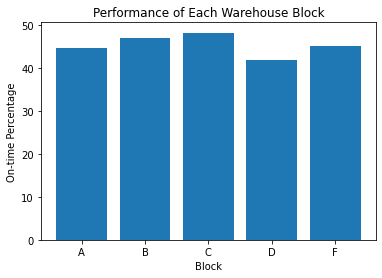

In [46]:
# plot a bar chart
blocks = ['A', 'B', 'C', 'D', 'F']
performance = [A_performance, B_performance, C_performance, D_performance, F_performance]
plt.bar(blocks, performance)
plt.title('Performance of Each Warehouse Block')
plt.xlabel('Block')
plt.ylabel('On-time Percentage')
plt.show()

Block C has the highest predicted on-time percentage so maybe the company can have all the high importance products stored in warehouse block C. Let's look at what percentage of high importance products were not in warehouse block C and did not arrive on time.

In [47]:
# import our full data set
df = pd.read_csv('df.csv')
late_high = round(100*len(df.loc[(df['Product_importance_high']==1) & (df['Warehouse_block_C']==0) & (df['On_time']==1)])/len(df.loc[df['Product_importance_high']==1]),2)
print(late_high, '% were late that were not in block C')

53.48 % were late that were not in block C


Warehouse block D has the lowest predicted on-time percentage. So we can see if any of those late shipments were from that block.

In [48]:
late_high_d = round(100*len(df.loc[(df['Product_importance_high']==1) & (df['Warehouse_block_D']==1) & (df['On_time']==1)])/len(df.loc[(df['Product_importance_high']==1) & (df['Warehouse_block_C']==0) & (df['On_time']==1)]),2)
print(late_high_d, '% that were late and not in block C were in block D')

20.51 % that were late and not in block C were in block D


So more than half of the high importance products that were late were not in warehouse block C, which has the best on-time performance. And of that total, over 20% were in warehouse block D, which has the worst on-time performance. Block C's on time performance is over 6% better than block D's. Just moving all the high importance products from D to C would increase on-time performance for high importance products. 

# Customer Rating Model

In [49]:
# use linear regression model to predict customer rating
ln = LinearRegression()
ln.fit(X_train_cr, y_train_cr)

LinearRegression()

In [50]:
y_pred = ln.predict(X_test_cr)
print('R^2 Score: ', r2_score(y_test_cr, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test_cr, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test_cr, y_pred))

R^2 Score:  -0.0018485263708267752
Mean Absolute Error:  1.2102255219696454
Mean Squared Error:  2.0093634997270673


Very low r2 score. Let's try using the scaled data set.

In [51]:
ln_scaled = LinearRegression()
ln_scaled.fit(X_train_cr_scaled, y_train_cr)
y_pred = ln_scaled.predict(X_test_cr_scaled)
print('R^2 Score: ', r2_score(y_test_cr, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test_cr, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test_cr, y_pred))

R^2 Score:  -0.00022001484990852305
Mean Absolute Error:  1.2099862780038932
Mean Squared Error:  2.006097265837527


# Lasso

In [52]:
from sklearn.linear_model import Lasso

lasso = Lasso(0.4, normalize=True)
lasso.fit(X_train_cr, y_train_cr)
y_pred = lasso.predict(X_test_cr)
print('R^2 Score: ', r2_score(y_test_cr, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test_cr, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test_cr, y_pred))

R^2 Score:  -3.2448824513808816e-05
Mean Absolute Error:  1.2046503734928555
Mean Squared Error:  2.0057210729148482


Maybe we need to do multiclass classification.

# SVC

In [53]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_cr, y_train_cr)

/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC()

In [54]:
y_pred = svc.predict(X_test_cr)
print(confusion_matrix(y_test_cr, y_pred))
print(classification_report(y_test_cr, y_pred))

[[  0 144  50 253   0]
 [  0 138  36 273   0]
 [  0 151  32 253   0]
 [  0 144  39 251   0]
 [  0 147  52 237   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       447
           2       0.19      0.31      0.24       447
           3       0.15      0.07      0.10       436
           4       0.20      0.58      0.30       434
           5       0.00      0.00      0.00       436

    accuracy                           0.19      2200
   macro avg       0.11      0.19      0.13      2200
weighted avg       0.11      0.19      0.13      2200



/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
# model using scaled data set
svc_scaled = SVC()
svc_scaled.fit(X_train_cr_scaled, y_train_cr)
y_pred = svc_scaled.predict(X_test_cr_scaled)
print(confusion_matrix(y_test_cr, y_pred))
print(classification_report(y_test_cr, y_pred))

/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[[109  69 134  71  64]
 [112  64 145  75  51]
 [ 86  55 158  67  70]
 [ 92  68 136  73  65]
 [ 97  65 137  58  79]]
              precision    recall  f1-score   support

           1       0.22      0.24      0.23       447
           2       0.20      0.14      0.17       447
           3       0.22      0.36      0.28       436
           4       0.21      0.17      0.19       434
           5       0.24      0.18      0.21       436

    accuracy                           0.22      2200
   macro avg       0.22      0.22      0.21      2200
weighted avg       0.22      0.22      0.21      2200



The scaled data gives improved results but still very low accuracy. Let's try random forest classifier.

# Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_cr, y_train_cr)
y_pred = rf.predict(X_test_cr)
print(confusion_matrix(y_test_cr, y_pred))
print(classification_report(y_test_cr, y_pred))

/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[[104  89  76  84  94]
 [ 93  82  99  95  78]
 [ 87  85  95  78  91]
 [ 91  87  85  78  93]
 [ 85  98  98  68  87]]
              precision    recall  f1-score   support

           1       0.23      0.23      0.23       447
           2       0.19      0.18      0.18       447
           3       0.21      0.22      0.21       436
           4       0.19      0.18      0.19       434
           5       0.20      0.20      0.20       436

    accuracy                           0.20      2200
   macro avg       0.20      0.20      0.20      2200
weighted avg       0.20      0.20      0.20      2200



In [57]:
# random forest on scaled data set
rf_scaled = RandomForestClassifier()
rf_scaled.fit(X_train_cr_scaled, y_train_cr)
y_pred = rf_scaled.predict(X_test_cr_scaled)
print(confusion_matrix(y_test_cr, y_pred))
print(classification_report(y_test_cr, y_pred))

/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[[110  84  92  70  91]
 [ 92  90  98  97  70]
 [ 89  82  97  78  90]
 [ 88  84  85  75 102]
 [ 97  88  81  75  95]]
              precision    recall  f1-score   support

           1       0.23      0.25      0.24       447
           2       0.21      0.20      0.21       447
           3       0.21      0.22      0.22       436
           4       0.19      0.17      0.18       434
           5       0.21      0.22      0.21       436

    accuracy                           0.21      2200
   macro avg       0.21      0.21      0.21      2200
weighted avg       0.21      0.21      0.21      2200



Results are about the same. I'm going to try Linear SVC.

# Linear SVC

In [58]:
from sklearn.svm import LinearSVC

lsvc = LinearSVC()
lsvc.fit(X_train_cr, y_train_cr)
y_pred = lsvc.predict(X_test_cr)
print(confusion_matrix(y_test_cr, y_pred))
print(classification_report(y_test_cr, y_pred))

/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[[  0   0 447   0   0]
 [  0   0 447   0   0]
 [  0   0 436   0   0]
 [  0   0 434   0   0]
 [  0   0 436   0   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       447
           2       0.00      0.00      0.00       447
           3       0.20      1.00      0.33       436
           4       0.00      0.00      0.00       434
           5       0.00      0.00      0.00       436

    accuracy                           0.20      2200
   macro avg       0.04      0.20      0.07      2200
weighted avg       0.04      0.20      0.07      2200



/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWa

# KNN

In [59]:
knn = KNeighborsClassifier()
knn.fit(X_train_cr, y_train_cr)
y_pred = knn.predict(X_test_cr)
print(confusion_matrix(y_test_cr, y_pred))
print(classification_report(y_test_cr, y_pred))

/opt/miniconda3/envs/conda_env/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[[136  92  92  78  49]
 [121 105  96  67  58]
 [122 106  99  63  46]
 [128  85  88  72  61]
 [117  90  89  82  58]]
              precision    recall  f1-score   support

           1       0.22      0.30      0.25       447
           2       0.22      0.23      0.23       447
           3       0.21      0.23      0.22       436
           4       0.20      0.17      0.18       434
           5       0.21      0.13      0.16       436

    accuracy                           0.21      2200
   macro avg       0.21      0.21      0.21      2200
weighted avg       0.21      0.21      0.21      2200



# Decision Tree

In [60]:
# Decision tree
tree = DecisionTreeClassifier()
tree.fit(X_train_cr, y_train_cr)
y_pred = tree.predict(X_test_cr)
print(confusion_matrix(y_test_cr, y_pred))
print(classification_report(y_test_cr, y_pred))

[[96 99 73 86 93]
 [88 93 93 85 88]
 [76 95 96 70 99]
 [87 77 89 84 97]
 [91 89 85 86 85]]
              precision    recall  f1-score   support

           1       0.22      0.21      0.22       447
           2       0.21      0.21      0.21       447
           3       0.22      0.22      0.22       436
           4       0.20      0.19      0.20       434
           5       0.18      0.19      0.19       436

    accuracy                           0.21      2200
   macro avg       0.21      0.21      0.21      2200
weighted avg       0.21      0.21      0.21      2200



There doesn't seem to be a modeling method that can accurately predict the customer ratings. They all have an accuracy of about 20% which is the same probability as guessing any of the 5 ratings.